# NET4103 - Network Science and Graph Learning
## Final Project

Author: Yuri de Sene Alvizi

In [1]:
import networkx as nx
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

### Question 1:

Reading

### Question 2:

The smallest network (Caltech) has 762 nodes in the largest connected component
(LCC), and the largest has more than 40000 nodes in the LCC.
Lets use three networks from the FB100: Caltech (with 762 nodes in the LCC), MIT
(which has 6402 nodes in the LCC), and Johns Hopkins (which has 5157 nodes in
the LCC).

a) For these three networks plot the degree distribution for each of the
three networks that you downloaded. What are you able to conclude from these
degree distributions?

In [20]:
# Import Caltech, MIT and Johns Hopkins data in gml files
caltech = nx.read_gml('data/Caltech36.gml')
mit = nx.read_gml('data/MIT8.gml')
jhu = nx.read_gml('data/Johns Hopkins55.gml')

# Degree of distribution of the three networks
caltech_degree = [d for n, d in caltech.degree()]
mit_degree = [d for n, d in mit.degree()]
jhu_degree = [d for n, d in jhu.degree()]

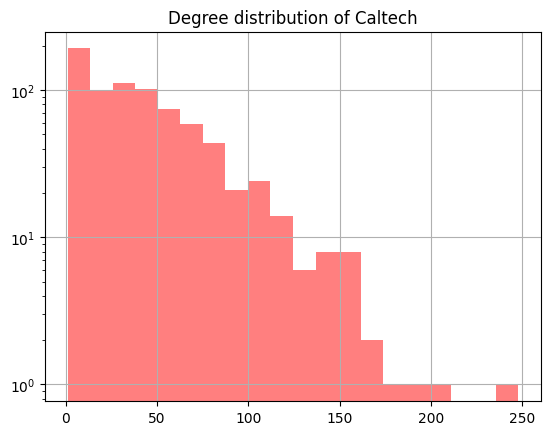

In [3]:
# Plot the degree distribution of the three networks
plt.hist(caltech_degree, bins=20, alpha=0.5, label='Caltech', color='r')
plt.grid(True)
plt.yscale('log')
plt.title('Degree distribution of Caltech')
plt.show()

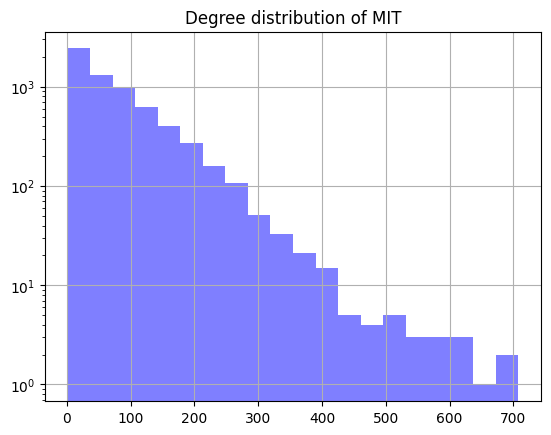

In [4]:
plt.hist(mit_degree, bins=20, alpha=0.5, label='MIT', color='b')
plt.yscale('log')
plt.grid(True)
plt.title('Degree distribution of MIT')
plt.show()

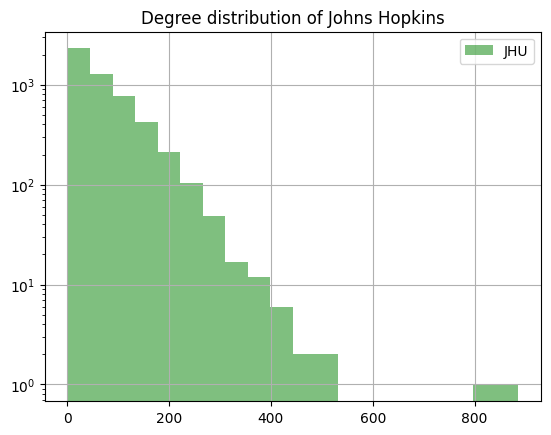

In [5]:
plt.hist(jhu_degree, bins=20, alpha=0.5, label='JHU', color='g')
plt.legend(loc='upper right')
plt.yscale('log')
plt.grid(True)
plt.title('Degree distribution of Johns Hopkins')
plt.show()

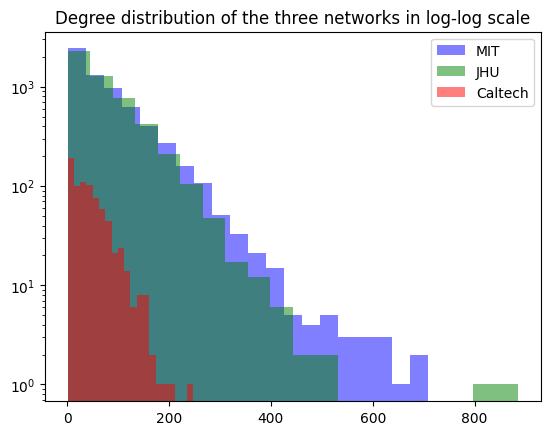

In [6]:
# Plot the degree distribution of the three networks in log-log scale
plt.hist(mit_degree, bins=20, alpha=0.5, label='MIT', color='b', log=True)
plt.hist(jhu_degree, bins=20, alpha=0.5, label='JHU', color='g', log=True)
plt.hist(caltech_degree, bins=20, alpha=0.5, label='Caltech', color='r', log=True)
plt.title('Degree distribution of the three networks in log-log scale')
plt.legend(loc='upper right')
plt.show()

(b) Compute the global clustering coefficient and mean local clustering
coefficient for each of the 3 networks. In addition compute the edge density of
each network. Should either of these networks be construed as sparse? Based on
the density information and the clustering information what can you said about
the graph topology?

In [7]:
# Compute the global clustering coefficient
caltech_cluster = nx.transitivity(caltech)
mit_cluster = nx.transitivity(mit)
jhu_cluster = nx.transitivity(jhu)

# Compute the mean local clustering coefficient
caltech_mean_cluster = nx.average_clustering(caltech)
mit_mean_cluster = nx.average_clustering(mit)
jhu_mean_cluster = nx.average_clustering(jhu)

# Compute the edge density
caltech_density = nx.density(caltech)
mit_density = nx.density(mit)
jhu_density = nx.density(jhu)

df = pd.DataFrame({'Network': ['Caltech', 'MIT', 'JHU'],
                     'Global clustering coefficient': [caltech_cluster, mit_cluster, jhu_cluster],
                     'Mean local clustering coefficient': [caltech_mean_cluster, mit_mean_cluster, jhu_mean_cluster],
                     'Edge density': [caltech_density, mit_density, jhu_density]})

df


,Network,Global clustering coefficient,Mean local clustering coefficient,Edge density
0,Caltech,0.291283,0.409294,0.056404
1,MIT,0.180288,0.271219,0.012118
2,JHU,0.193161,0.268393,0.013910


c) For each network, also draw a scatter plot of the degree versus local
clustering coefficient. Based on these calculations as well as your previous ones,
are you able to draw any conclusions about any similarities or differences between
the tree networks? What other observations can you make?

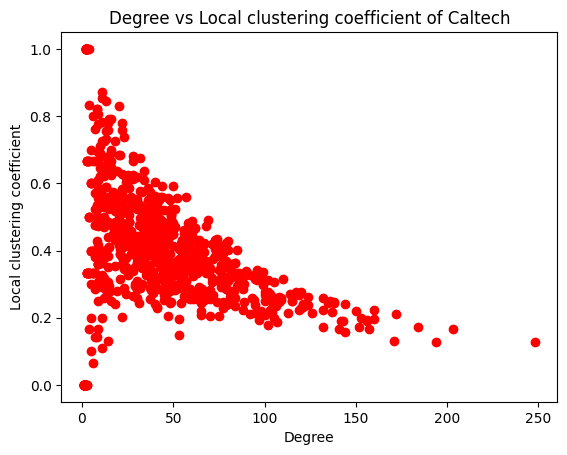

In [8]:
# For each network, also draw a scatter plot of the degree versus local clustering coefficient.

# Caltech
caltech_cluster = nx.clustering(caltech)
caltech_cluster_values = [caltech_cluster[n] for n in caltech.nodes()]

plt.scatter(caltech_degree, caltech_cluster_values, color='r')
plt.title('Degree vs Local clustering coefficient of Caltech')
plt.xlabel('Degree')
plt.ylabel('Local clustering coefficient')
plt.show()


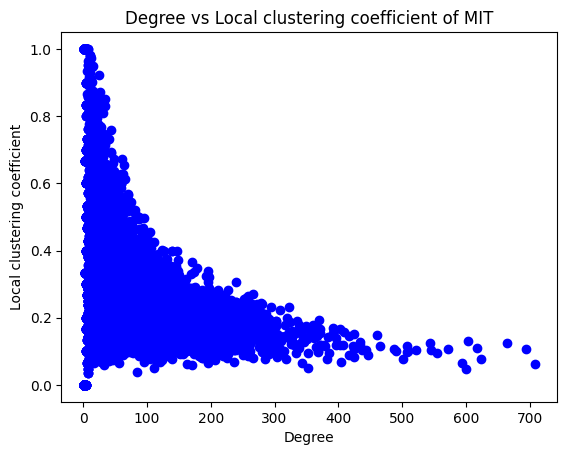

In [9]:
mit_cluster = nx.clustering(mit)
mit_cluster_values = [mit_cluster[n] for n in mit.nodes()]

plt.scatter(mit_degree, mit_cluster_values, color='b')
plt.title('Degree vs Local clustering coefficient of MIT')
plt.xlabel('Degree')
plt.ylabel('Local clustering coefficient')
plt.show()

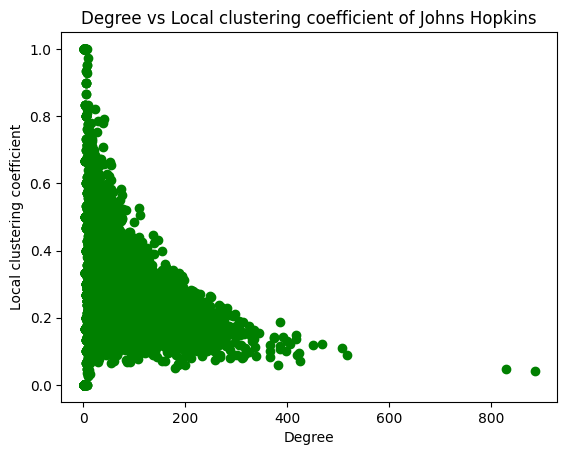

In [10]:
jhu_cluster = nx.clustering(jhu)
jhu_cluster_values = [jhu_cluster[n] for n in jhu.nodes()]

plt.scatter(jhu_degree, jhu_cluster_values, color='g')
plt.title('Degree vs Local clustering coefficient of Johns Hopkins')
plt.xlabel('Degree')
plt.ylabel('Local clustering coefficient')
plt.show()

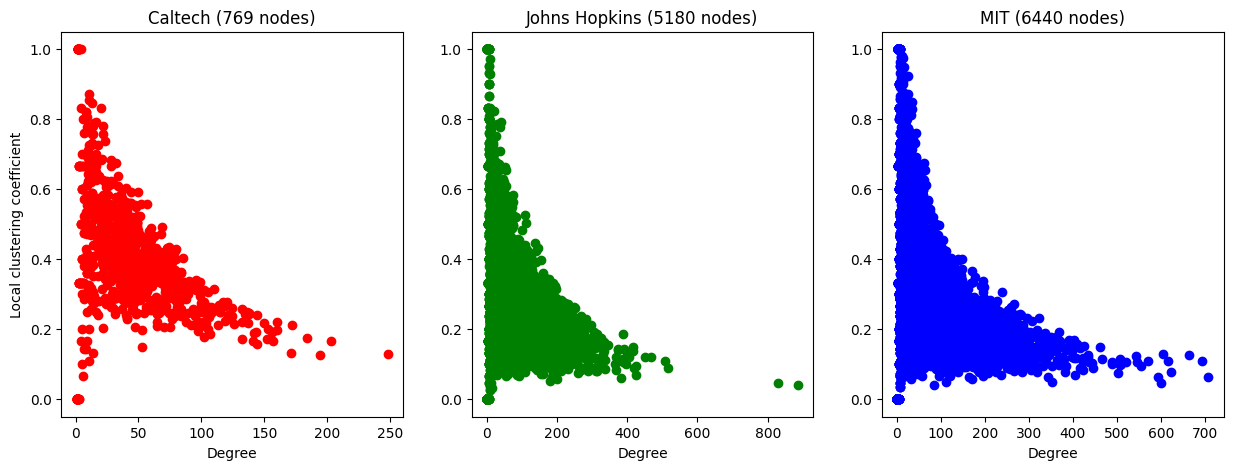

In [11]:
n_nodes_caltech = caltech.number_of_nodes()
n_nodes_mit = mit.number_of_nodes()
n_nodes_jhu = jhu.number_of_nodes()

# For each network, draw scatter plot side by side of the degree versus local clustering coefficient

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(caltech_degree, caltech_cluster_values, color='r')
axs[0].set_title(f'Caltech ({n_nodes_caltech} nodes)')
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('Local clustering coefficient')

axs[1].scatter(jhu_degree, jhu_cluster_values, color='g')
axs[1].set_title(f'Johns Hopkins ({n_nodes_jhu} nodes)')
axs[1].set_xlabel('Degree')

axs[2].scatter(mit_degree, mit_cluster_values, color='b')
axs[2].set_title(f'MIT ({n_nodes_mit} nodes)')
axs[2].set_xlabel('Degree')

plt.show()

### Question 3: Assortativity Analysis with the Facebook100 Dataset

In this question we expect you will compute the assortativity on a large set of graphs
(if possible all the graphs).

a) Of the FB100 networks, investigate the assortativity patterns for five
vertex attributes: (i) student/faculty status, (ii) major, (iii) vertex degree, and
(iiii) dorm, (iiiii) gender. Treat these networks as simple graphs in your analysis.
For each vertex attribute, make a scatter plot showing the assortativity versus
network size n, with log-linear axes for all 100 networks, and a histogram or
density plot showing the distribution of assortativity values. In both figures,
include a line indicating no assortativity. Briefly discuss the degree to which
vertices do or do not exhibit assortative mixing on each attribute, and speculate about what kind of processes or tendencies in the formation of Facebook
friendships might produce this kind of pattern. For example, below are figures
for assortativity by gender on these networks. The distribution of points spans
the line of no assortativity, with some values nearly as far below 0 as others are
above 0. However, the gender attributes do appear to be slightly assortative in
these social networks: although all values are within 6% in either direction of 0,
the mean assortativity is 0.02, which is slightly above 0. This suggests a slight
amount of homophily by gender (like links with like) in the way people friend
each other on Facebook, although the tendency is very weak. In some schools,
we see a slight tendency for heterophily (like links with dislike), as one might
expect if the networks reflected heteronormative dating relationships.

In [2]:
import os
import pandas as pd
import networkx as nx
from tqdm import tqdm

df = pd.DataFrame(columns=['Network', 'Size', 'Student_fac assortativity', 'Major assortativity', 'Degree assortativity', 'Dorm assortativity', 'Gender assortativity'])

# Check if the file assortativity_results.csv exists and create it if it doesn't
if not os.path.exists('assortativity_results.csv'):
    df.to_csv('assortativity_results.csv', index=False)

df = pd.read_csv('assortativity_results.csv')

# Retrieve the networks in network column of df
networks = df['Network'].values

print('Networks already processed:', networks)

# List all .gml files in the data directory
files = [file for file in os.listdir('data') if file.endswith('.gml') and file.split('.')[0] not in networks]

# Use tqdm to add a progress bar
for file in tqdm(files, desc="Processing networks"):
    network = nx.read_gml(f'data/{file}')
    student_fac_assortativity = nx.attribute_assortativity_coefficient(network, 'student_fac')
    major_assortativity = nx.attribute_assortativity_coefficient(network, 'major_index')
    degree_assortativity = nx.degree_assortativity_coefficient(network)
    dorm_assortativity = nx.attribute_assortativity_coefficient(network, 'dorm')
    gender_assortativity = nx.attribute_assortativity_coefficient(network, 'gender')

    new_df = pd.DataFrame({'Network': [file.split('.')[0]],
                           'Size': [network.number_of_nodes()],
                           'Student_fac assortativity': [student_fac_assortativity],
                           'Major assortativity': [major_assortativity],
                           'Degree assortativity': [degree_assortativity],
                           'Dorm assortativity': [dorm_assortativity],
                           'Gender assortativity': [gender_assortativity]})
    
    # Append the new results to the csv file
    new_df.to_csv('assortativity_results.csv', mode='a', header=False, index=False)

df = pd.read_csv('assortativity_results.csv')
df.head()


Networks already processed: []


Processing networks: 100%|██████████| 100/100 [51:16<00:00, 30.77s/it]


,Network,Size,Student_fac assortativity,Major assortativity,Degree assortativity,Dorm assortativity,Gender assortativity
0,USFCA72,2682,0.211121,0.066953,0.091895,0.196693,0.021769
1,Maryland58,20871,0.273318,0.051397,0.001422,0.161279,0.048339
2,Wesleyan43,3593,0.394185,0.049695,0.095083,0.110375,0.031646
3,Tufts18,6682,0.432163,0.041785,0.118031,0.123066,0.050504
4,Notre Dame57,12155,0.463167,0.046788,0.047713,0.209087,0.110546


In [3]:
networks_size = df['Size'].values
student_fac_assortativity = df['Student_fac assortativity'].values
major_assortativity = df['Major assortativity'].values
degree_assortativity = df['Degree assortativity'].values
dorm_assortativity = df['Dorm assortativity'].values
gender_assortativity = df['Gender assortativity'].values

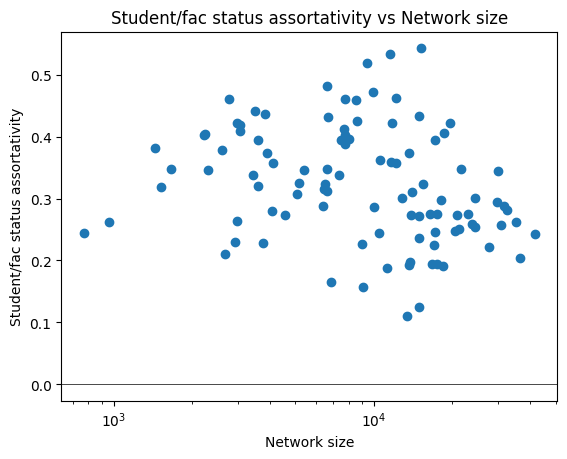

In [4]:
plt.scatter(networks_size, student_fac_assortativity)
plt.title('Student/fac status assortativity vs Network size')
plt.xscale('log')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Network size')
plt.ylabel('Student/fac status assortativity')
plt.show()

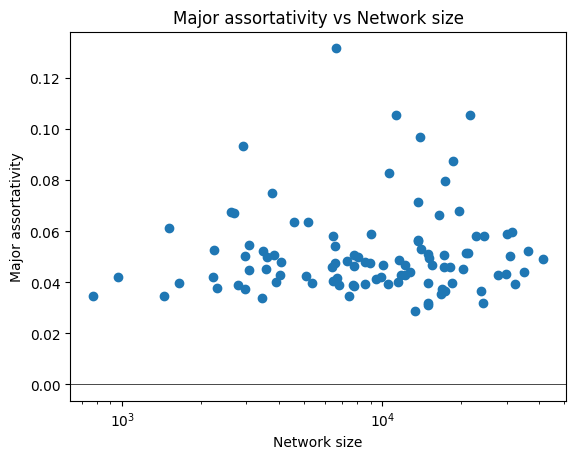

In [5]:
plt.scatter(networks_size, major_assortativity)
plt.title('Major assortativity vs Network size')
plt.axhline(0, color='black', linewidth=0.5)
plt.xscale('log')
plt.xlabel('Network size')
plt.ylabel('Major assortativity')
plt.show()

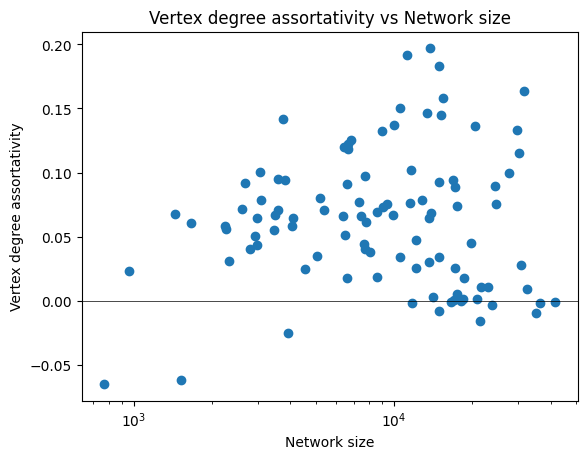

In [6]:
plt.scatter(networks_size, degree_assortativity)
plt.title('Vertex degree assortativity vs Network size')
plt.axhline(0, color='black', linewidth=0.5)
plt.xscale('log')
plt.xlabel('Network size')
plt.ylabel('Vertex degree assortativity')
plt.show()

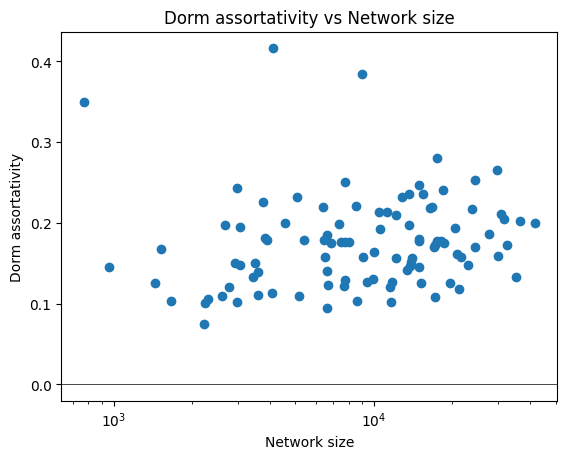

In [7]:
plt.scatter(networks_size, dorm_assortativity)
plt.title('Dorm assortativity vs Network size')
plt.axhline(0, color='black', linewidth=0.5)
plt.xscale('log')
plt.xlabel('Network size')
plt.ylabel('Dorm assortativity')
plt.show()

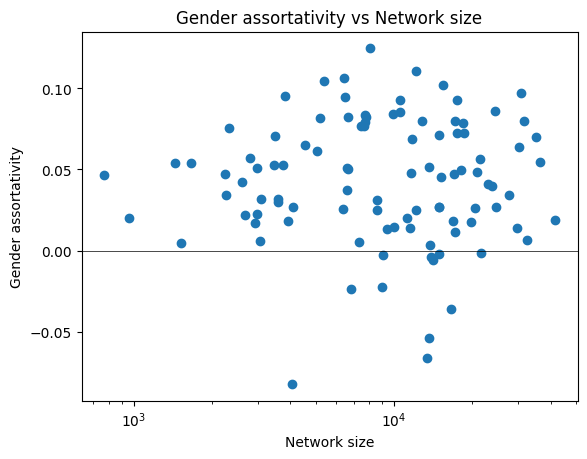

In [8]:
plt.scatter(networks_size, gender_assortativity)
plt.title('Gender assortativity vs Network size')
plt.axhline(0, color='black', linewidth=0.5)
plt.xscale('log')
plt.xlabel('Network size')
plt.ylabel('Gender assortativity')
plt.show()

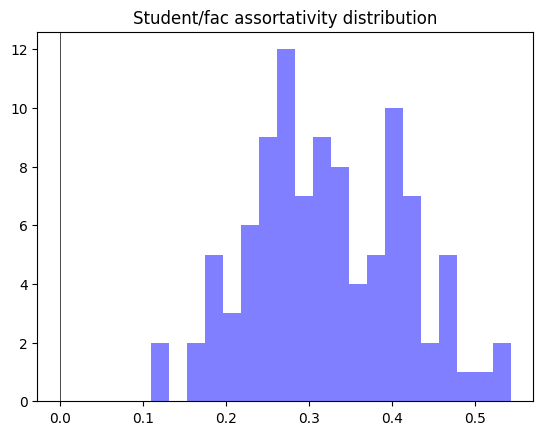

In [9]:
plt.hist(student_fac_assortativity, bins=20, alpha=0.5, color='b')
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Student/fac assortativity distribution')
plt.show()

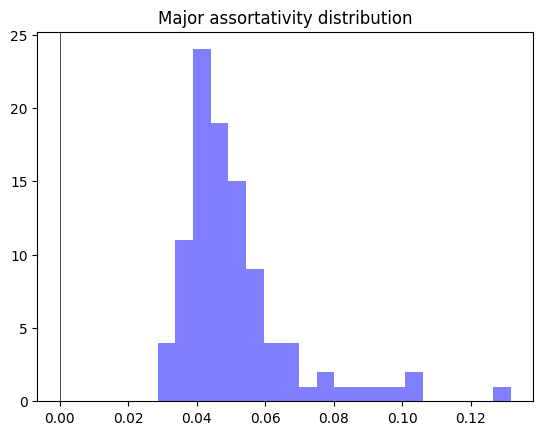

In [10]:
plt.hist(major_assortativity, bins=20, alpha=0.5, color='b')
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Major assortativity distribution')
plt.show()

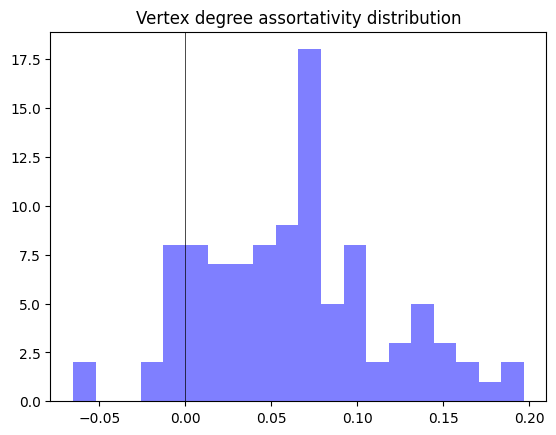

In [11]:
plt.hist(degree_assortativity, bins=20, alpha=0.5, color='b')
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Vertex degree assortativity distribution')
plt.show()

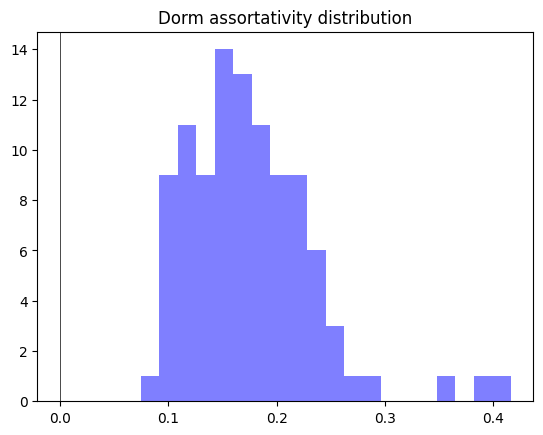

In [12]:
plt.hist(dorm_assortativity, bins=20, alpha=0.5, color='b')
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Dorm assortativity distribution')
plt.show()

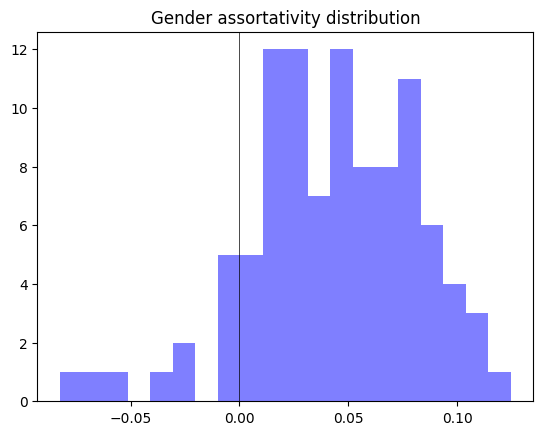

In [13]:
plt.hist(gender_assortativity, bins=20, alpha=0.5, color='b')
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Gender assortativity distribution')
plt.show()

### Question 4

In this question we expect you will compute the link prediction algorithms on a large
set of graphs (> 10).

a) Reading

b) Implement the following link prediction metrics: common neighbors,
jaccard, Adamic/Adar. We use the scikit-learn API as an example for our
implementation of the link prediction metrics. Please use the implementation
(in listing. 1) as an example. Your implementation should inherit from the class
LinkPrediction defined in listing. 1. You should implement yourself the
given metrics, don’t used the ones defined in Networkx

In [15]:
from abc import ABC
from abc import abstractmethod

class LinkPrediction(ABC):
    def __init__(self, graph):
        """
        Constructor

        Parameters
        ----------
            graph : Networkx graph
        """
        self.graph = graph
        self.N = len(graph)

    def neighbors(self, v):
        """
        Return the neighbors list of a node

        Parameters
        ----------
            v : int
            node id

        Return
        ------
            neighbors_list : python list
        """
        neighbors_list = self.graph.neighbors(v)
        return list(neighbors_list)

    @abstractmethod
    def fit(self):
        raise NotImplementedError(" Fit must be implemented ")


In [16]:
class CommonNeighbors(LinkPrediction):
    def __init__(self, graph):
        """
        Constructor for CommonNeighbors metric

        Parameters
        ----------
            graph : Networkx graph
        """
        super(CommonNeighbors, self).__init__(graph)

    def fit(self):
        """
        Compute the common neighbors score for all node pairs
        Returns
        -------
            scores : dict
                A dictionary where the key is a tuple (u, v) representing a node pair,
                and the value is the number of common neighbors for that pair.
        """
        scores = {}
        nodes = list(self.graph.nodes())

        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                u, v = nodes[i], nodes[j]

                # Ensure there isn't already an edge between u and v
                if not self.graph.has_edge(u, v):
                    # Calculate the number of common neighbors
                    neighbors_u = set(self.neighbors(u))
                    neighbors_v = set(self.neighbors(v))
                    common = neighbors_u.intersection(neighbors_v)

                    # Store the score
                    scores[(u, v)] = len(common)

        return scores


In [17]:
class Jaccard(LinkPrediction):
    def __init__(self, graph):
        """
        Constructor for Jaccard metric

        Parameters
        ----------
            graph : Networkx graph
        """
        super(Jaccard, self).__init__(graph)

    def fit(self):
        """
        Compute the Jaccard similarity score for all node pairs
        Returns
        -------
            scores : dict
                A dictionary where the key is a tuple (u, v) representing a node pair,
                and the value is the Jaccard similarity score for that pair.
        """
        scores = {}
        nodes = list(self.graph.nodes())

        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                u, v = nodes[i], nodes[j]

                # Ensure there isn't already an edge between u and v
                if not self.graph.has_edge(u, v):
                    # Retrieve neighbors
                    neighbors_u = set(self.neighbors(u))
                    neighbors_v = set(self.neighbors(v))

                    # Calculate Jaccard similarity
                    union_size = len(neighbors_u.union(neighbors_v))
                    intersection_size = len(neighbors_u.intersection(neighbors_v))

                    # Avoid division by zero
                    if union_size > 0:
                        scores[(u, v)] = intersection_size / union_size
                    else:
                        scores[(u, v)] = 0.0

        return scores


In [18]:
class AdamicAdar(LinkPrediction):
    def __init__(self, graph):
        """
        Constructor for Adamic/Adar metric

        Parameters
        ----------
            graph : Networkx graph
        """
        super(AdamicAdar, self).__init__(graph)

    def fit(self):
        """
        Compute the Adamic/Adar score for all node pairs
        Returns
        -------
            scores : dict
                A dictionary where the key is a tuple (u, v) representing a node pair,
                and the value is the Adamic/Adar score for that pair.
        """
        scores = {}
        nodes = list(self.graph.nodes())

        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                u, v = nodes[i], nodes[j]

                # Ensure there isn't already an edge between u and v
                if not self.graph.has_edge(u, v):
                    # Retrieve neighbors
                    neighbors_u = set(self.neighbors(u))
                    neighbors_v = set(self.neighbors(v))

                    # Compute Adamic/Adar score
                    common_neighbors = neighbors_u.intersection(neighbors_v)
                    score = sum(1 / np.log(len(self.neighbors(node))) for node in common_neighbors if len(self.neighbors(node)) > 1)

                    # Store the score
                    scores[(u, v)] = score

        return scores


In [22]:
network_test = caltech

# Instantiate the link prediction algorithms
common_neighbors = CommonNeighbors(network_test)
jaccard = Jaccard(network_test)
adamic_adar = AdamicAdar(network_test)

# Compute the scores
common_neighbors_scores = common_neighbors.fit()
print("Common neighbors finished")
jaccard_scores = jaccard.fit()
print("Jaccard finished")
adamic_adar_scores = adamic_adar.fit()

# Sort the scores
common_neighbors_scores = {k: v for k, v in sorted(common_neighbors_scores.items(), key=lambda item: item[1], reverse=True)}
jaccard_scores = {k: v for k, v in sorted(jaccard_scores.items(), key=lambda item: item[1], reverse=True)}
adamic_adar_scores = {k: v for k, v in sorted(adamic_adar_scores.items(), key=lambda item: item[1], reverse=True)}

# Print the top 10 scores for each algorithm
print("Common neighbors")
print(list(common_neighbors_scores.items())[:10])
print("Jaccard")
print(list(jaccard_scores.items())[:10])
print("Adamic/Adar")
print(list(adamic_adar_scores.items())[:10])

Common neighbors finished
Jaccard finished
Common neighbors
[(('222', '622'), 82), (('329', '708'), 70), (('663', '708'), 70), (('89', '256'), 66), (('372', '637'), 66), (('376', '663'), 64), (('562', '663'), 63), (('84', '150'), 60), (('89', '669'), 60), (('222', '663'), 59)]
Jaccard
[(('86', '598'), 0.7272727272727273), (('36', '750'), 0.6666666666666666), (('440', '546'), 0.6), (('142', '229'), 0.55), (('229', '438'), 0.5238095238095238), (('199', '499'), 0.5166666666666667), (('18', '317'), 0.5), (('74', '158'), 0.5), (('91', '626'), 0.5), (('99', '261'), 0.5)]
Adamic/Adar
[(('222', '622'), 19.45697713522865), (('329', '708'), 17.120001873019017), (('663', '708'), 16.84367084728338), (('372', '637'), 16.02061744748231), (('89', '256'), 15.166797453704778), (('562', '663'), 14.862555195624035), (('89', '669'), 14.794429789109518), (('376', '663'), 14.770846964218501), (('222', '708'), 14.297052524864041), (('222', '663'), 14.24552564253224)]
